In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
# nearest city code from https://github.com/wingchen/citipy#readme
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [6]:
range(len(cities))

range(0, 624)

In [7]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuatapere
Processing Record 2 of Set 1 | esmeraldas
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | rundu
Processing Record 5 of Set 1 | northam
Processing Record 6 of Set 1 | bonthe
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | saint george
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | aksarka
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | rafraf
Processing Record 16 of Set 1 | huarmey
Processing Record 17 of Set 1 | ucluelet
Processing Record 18 of Set 1 | mitsamiouli
Processing Record 19 of Set 1 | ossora
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | sitka
Processing Record 23

Processing Record 37 of Set 4 | luderitz
Processing Record 38 of Set 4 | kindu
Processing Record 39 of Set 4 | dwarka
Processing Record 40 of Set 4 | purpe
Processing Record 41 of Set 4 | port hardy
Processing Record 42 of Set 4 | urumqi
Processing Record 43 of Set 4 | taoudenni
Processing Record 44 of Set 4 | banfora
Processing Record 45 of Set 4 | sambava
Processing Record 46 of Set 4 | bairiki
Processing Record 47 of Set 4 | la union
Processing Record 48 of Set 4 | calabozo
Processing Record 49 of Set 4 | brejo santo
Processing Record 50 of Set 4 | naliya
Processing Record 1 of Set 5 | saleaula
City not found. Skipping...
Processing Record 2 of Set 5 | quetzaltepec
City not found. Skipping...
Processing Record 3 of Set 5 | norman wells
Processing Record 4 of Set 5 | montevideo
Processing Record 5 of Set 5 | winton
Processing Record 6 of Set 5 | lorengau
Processing Record 7 of Set 5 | hurricane
Processing Record 8 of Set 5 | westport
Processing Record 9 of Set 5 | namibe
Processing R

Processing Record 25 of Set 8 | rafai
Processing Record 26 of Set 8 | ipixuna
Processing Record 27 of Set 8 | urucara
Processing Record 28 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 29 of Set 8 | celestun
Processing Record 30 of Set 8 | jabiru
City not found. Skipping...
Processing Record 31 of Set 8 | goderich
Processing Record 32 of Set 8 | yenagoa
Processing Record 33 of Set 8 | ridgecrest
Processing Record 34 of Set 8 | mandalgovi
Processing Record 35 of Set 8 | mouila
Processing Record 36 of Set 8 | ojinaga
Processing Record 37 of Set 8 | vao
Processing Record 38 of Set 8 | banda aceh
Processing Record 39 of Set 8 | dombarovskiy
Processing Record 40 of Set 8 | koson
Processing Record 41 of Set 8 | ekhabi
Processing Record 42 of Set 8 | sobolevo
Processing Record 43 of Set 8 | chagda
City not found. Skipping...
Processing Record 44 of Set 8 | dingle
Processing Record 45 of Set 8 | mocuba
Processing Record 46 of Set 8 | tazmalt
Processing Record 47 of Set 8 |

Processing Record 14 of Set 12 | chibuto
Processing Record 15 of Set 12 | rocha
Processing Record 16 of Set 12 | lagoa
Processing Record 17 of Set 12 | anta
Processing Record 18 of Set 12 | barra
Processing Record 19 of Set 12 | ialibu
Processing Record 20 of Set 12 | skjervoy
Processing Record 21 of Set 12 | novopokrovka
City not found. Skipping...
Processing Record 22 of Set 12 | te anau
Processing Record 23 of Set 12 | kuang
Processing Record 24 of Set 12 | rungata
City not found. Skipping...
Processing Record 25 of Set 12 | russell
Processing Record 26 of Set 12 | havre-saint-pierre
Processing Record 27 of Set 12 | gravelbourg
Processing Record 28 of Set 12 | kasongo-lunda
Processing Record 29 of Set 12 | dubbo
Processing Record 30 of Set 12 | kyren
Processing Record 31 of Set 12 | yar-sale
Processing Record 32 of Set 12 | sovetskiy
Processing Record 33 of Set 12 | pericos
Processing Record 34 of Set 12 | aswan
Processing Record 35 of Set 12 | sao gabriel da cachoeira
Processing Re

In [11]:
len(city_data)

574

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuatapere,-46.1333,167.6833,65.82,43,100,2.86,NZ,2022-02-14 21:48:15
1,Esmeraldas,-19.7625,-44.3139,84.31,89,28,1.52,BR,2022-02-14 21:44:15
2,Butaritari,3.0707,172.7902,82.22,72,80,15.66,KI,2022-02-14 21:48:16
3,Rundu,-17.9333,19.7667,65.37,95,83,3.33,NA,2022-02-14 21:48:16
4,Northam,51.0333,-4.2167,45.61,79,9,15.86,GB,2022-02-14 21:48:17
5,Bonthe,7.5264,-12.5050,78.80,83,4,7.07,SL,2022-02-14 21:48:18
6,Puerto Ayora,-0.7393,-90.3518,84.16,87,81,5.99,EC,2022-02-14 21:48:18
7,Rikitea,-23.1203,-134.9692,78.60,68,59,9.98,PF,2022-02-14 21:48:19
8,Saint George,37.1041,-113.5841,72.07,15,0,1.01,US,2022-02-14 21:46:18
9,Thompson,55.7435,-97.8558,-9.24,54,0,5.75,CA,2022-02-14 21:44:45


In [13]:
new_col_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_col_order]

In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

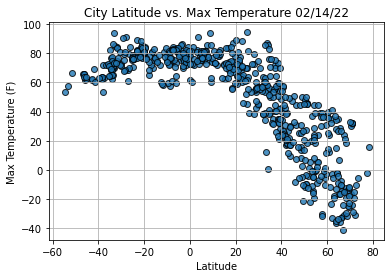

In [16]:
# Import time module
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig1.png")

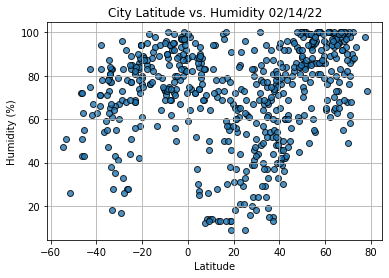

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

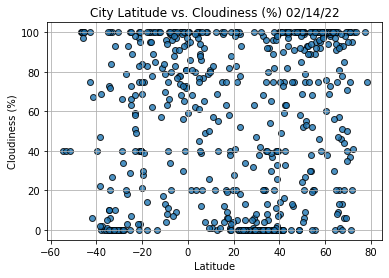

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

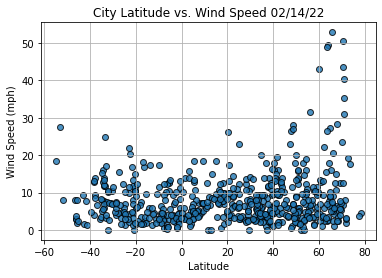

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                       Rafraf
Country                        TN
Date          2022-02-14 21:48:23
Lat                       37.1904
Lng                       10.1837
Max Temp                    55.71
Humidity                       81
Cloudiness                     75
Wind Speed                   8.55
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
569     True
570    False
571     True
572    False
573     True
Name: Lat, Length: 574, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Butaritari,KI,2022-02-14 21:48:16,3.0707,172.7902,82.22,72,80,15.66
4,Northam,GB,2022-02-14 21:48:17,51.0333,-4.2167,45.61,79,9,15.86
5,Bonthe,SL,2022-02-14 21:48:18,7.5264,-12.5050,78.80,83,4,7.07
8,Saint George,US,2022-02-14 21:46:18,37.1041,-113.5841,72.07,15,0,1.01
9,Thompson,CA,2022-02-14 21:44:45,55.7435,-97.8558,-9.24,54,0,5.75


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

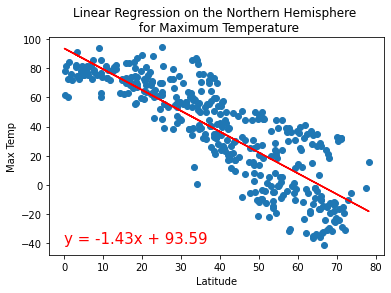

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,-40))

In [58]:
# Perform linear regression.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value.
print(f"The r-value is: {r_value:.3f}")

The r-value is: -0.842


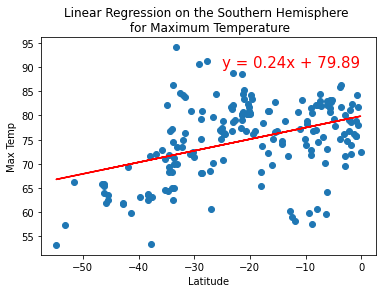

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-25,90))

In [64]:
# Perform linear regression.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value.
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.405


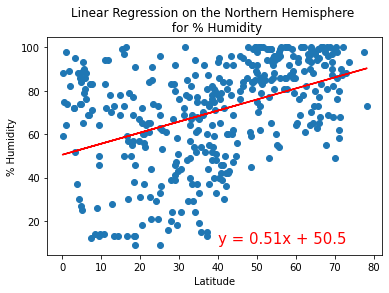

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

In [65]:
# Perform linear regression.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value.
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.428


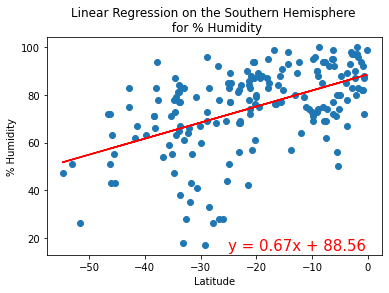

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,15))

In [66]:
# Perform linear regression.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value.
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.507


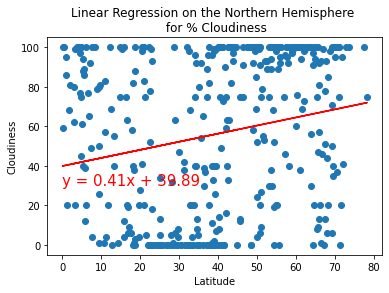

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 'Cloudiness',(0,30))

In [62]:
# Perform linear regression.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value.
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.206


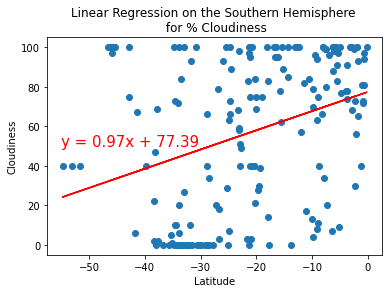

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 'Cloudiness',(-55,50))

In [63]:
# Perform linear regression.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value.
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.341


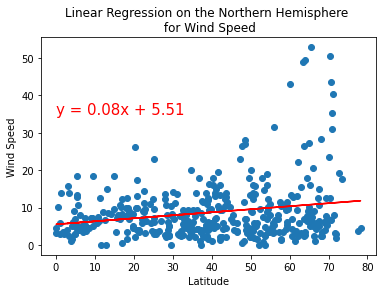

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,35))

In [69]:
# Perform linear regression.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value.
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.210


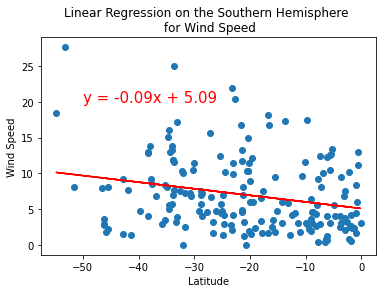

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))

In [73]:
# Perform linear regression.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value.
print(f"The r-value is: {r_value:.3f}")

The r-value is: -0.243
